3.2.1 生成数据集

$  y = Xw+b  + c$  , c 是噪声

In [62]:
import torch 
from d2l import torch as d2l
def synthetic_data(w, b , num_examples):
    # 正态分布采样生成 num_examples 组 x  的数据，
    X = torch.normal(0, 1,(num_examples, len(w)) )
    y = torch.matmul(X, w) + b
    # 添加噪声
    y+= torch.normal(0,0.01, y.shape)
    # 返回的 两个列向量
    #print(X .shape, w.shape,y.shape)
    return X,  y.reshape((-1, 1))

true_w = torch.tensor([2. ,-3.4])
true_b = torch.tensor(4.2)

features, labels = synthetic_data(true_w, true_b , 1000)
features.shape, labels.shape


(torch.Size([1000, 2]), torch.Size([1000, 1]))

In [49]:
print(f'features: {features[0]},\n label:{labels[0]}')

features: tensor([-0.2044,  0.1089]),
 label:tensor([3.4105])


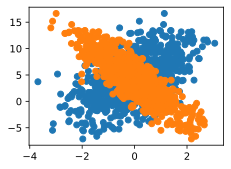

In [50]:
d2l.set_figsize()

d2l.plt.scatter(features[:, 0].detach().numpy(), labels.detach().numpy())
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy())


3.2.2 读取数据集


In [51]:
import random
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))

    random.shuffle(indices)
    for i in range(0 , num_examples, batch_size):
        batch_indice = torch.tensor(
            indices[i :  min(i+ batch_size,  num_examples)])
        yield features[batch_indice], labels[batch_indice]

In [ ]:
batchsize = 10 
# 读取小批量数据
for X , y in data_iter(batchsize, features , labels):
    print(X , '\n', y)
    break

3.2.3 初始化模型参数

In [64]:
w = torch.normal(0,0.01,(2,1), requires_grad=True )
b = torch.zeros(1, requires_grad=True)

3.2.4 定义模型

In [54]:
def linreg(X , w,  b):
    return torch.matmul(X, w) + b

3.2.5 定义损失函数

In [55]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 /2   # 除的的参数数量，维度

3.2.6 定义 优化算法

In [56]:
def sgd(params, lr,  batch_size):
    '''小批量随机梯度下降'''
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad  / batch_size
            param.grad.zero_()

3.2.7 训练

In [72]:
lr = 0.00003
num_epochs =5
net = linreg
loss = squared_loss

In [80]:
for epoch in range(num_epochs):
    for X , y in data_iter(batchsize, features,labels):
        l = loss(net(X, w , b), y)
        l.sum().backward()
        sgd([w, b], lr , batchsize)
    with torch.no_grad ():
        train_l = loss(net(features , w, b) , labels)
        print(f'epoch:{epoch + 1}, loss: {train_l.mean():.10f}')

epoch:1, loss: 0.0000494043
epoch:2, loss: 0.0000494042
epoch:3, loss: 0.0000494042
epoch:4, loss: 0.0000494042
epoch:5, loss: 0.0000494043
